In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wgrywanie danych

In [66]:
dane = pd.read_csv("uchowce.csv")
display(dane)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.490,0.380,0.125,0.5490,0.2450,0.1075,0.1740,10
1,I,0.450,0.335,0.115,0.3935,0.1950,0.0710,0.1100,7
2,I,0.475,0.360,0.145,0.6325,0.2825,0.1370,0.1900,8
3,I,0.560,0.440,0.165,0.8000,0.3350,0.1735,0.2500,12
4,M,0.625,0.480,0.160,1.2415,0.6575,0.2625,0.2785,9
...,...,...,...,...,...,...,...,...,...
3672,F,0.620,0.485,0.165,1.1660,0.4830,0.2380,0.3550,13
3673,M,0.600,0.485,0.175,1.2675,0.4995,0.2815,0.3800,13
3674,F,0.530,0.405,0.130,0.6355,0.2635,0.1565,0.1850,9
3675,M,0.500,0.385,0.145,0.7615,0.2460,0.1950,0.2040,14


# Wstępna analiza danych

Dane zawierają informacje na temat uchowców (inaczej słuchotek), dotyczące wagi oraz wymiarów osobników z podziałem na płcie z wyróżnieniem osobników niedojrzałych oraz liczbę pierścieni znajdujących się na muszlach, która służy do określania ich wieku. 

In [10]:
dane.shape

(3677, 9)

Zbiór danych ma 3677 wierszy i 9 kolumn.

Wypiszemy teraz, jakie kolumny znajdują się w danych i opiszemy czego dotyczą.

In [13]:
dane.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Poszczególne kolumny oznaczają:
* **SEX** - wartość 'M' (male) oznacza dorosłe osobniki męskie, 'F' (female) oznacza dorosłe osobniki żeńskie, a 'I' (infant) - młode/niedojrzałe osobniki.
* **LENGTH** - długość, czyli najdłuższy pomiar muszli w milimetrach ($mm$).
* **DIAMETER** - średnica muszli mierzona prostopadle do długości podawana w milimetrach.
* **HEIGHT** - wysokość muszli z mięsem w środku podawana w milimetrach.
* **WHOLE WEIGHT** - waga całkowita uchowca w gramach ($g$).
* **SHUCKED WEIGHT** - waga mięsa w gramach.
* **VISCERA WEIGHT** - waga wnętrzności bez krwi podawana w gramach.
* **SHELL WEIGHT** - waga muszli po wysuszeniu w gramach.
* **RINGS** - liczba pierścieni na muszli. Aby otrzymać przybliżony wiek słuchotki, do oszacowanej liczby pierścieni należy dodać 1.5.

Sprawdzimy, czy w danych są braki oraz jakiego typu są dane w poszczególnych kolumnach.

In [17]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3677 non-null   object 
 1   Length          3677 non-null   float64
 2   Diameter        3677 non-null   float64
 3   Height          3677 non-null   float64
 4   Whole weight    3677 non-null   float64
 5   Shucked weight  3677 non-null   float64
 6   Viscera weight  3677 non-null   float64
 7   Shell weight    3677 non-null   float64
 8   Rings           3677 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 258.7+ KB


Widzimy, że w danych nie ma braków. Sprawdzimy teraz, jakie wartości znajdują się w kolumnie z danymi typu 'object'.

In [20]:
dane["Sex"].describe()

count     3677
unique       3
top          M
freq      1366
Name: Sex, dtype: object

Kolumna 'Sex' zawiera trzy unikalne wartości, zatem dane w tych kolumnach są poprawnie wprowadzone. Sprawdzimy liczebność poszczególnych wartości.

In [23]:
counts_P = dane['Sex'].value_counts()
counts_P

Sex
M    1366
I    1168
F    1143
Name: count, dtype: int64

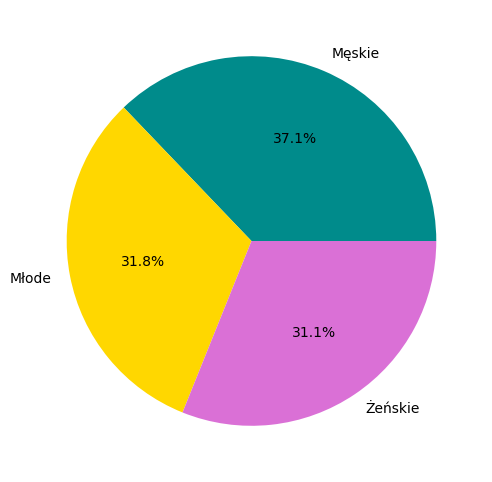

In [25]:
plt.figure(figsize=(6,6))
plt.pie(counts_P, labels= ["Męskie", "Młode", "Żeńskie"], autopct='%1.1f%%', colors=['darkcyan', 'gold', 'orchid']);

Możemy zauważyć, że wszystkie grupy są mniej więcej równoliczne.

Osobniki 'infant' powinny być młodsze lub mniejsze od osobników z określoną płcią. Słuchotki zazwyczaj osiągają dojrzałość płciową między 3 a 5 rokiem życia, a w niektórych przypadkach mając około 7 lat. Sprawdzimy zatem, czy w danych występują osobniki 'I', które mają więcej niż 6 pierścieni.

In [28]:
dane[(dane['Rings'] > 6) & (dane['Sex'] == 'I')].shape[0]

842

Zatem większość osobników określonych jako 'infant' ma ponad 6 pierścieni. Określenie 'infant' może też odnosić się do osobników, które mają mniejsze wymiary lub wagę od innych, czyli wolniej się rozwijają. 

Następnie przeanalizujemy kolumny, w których znajdują się wartości numeryczne.

In [33]:
dane.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,0.524965,0.408586,0.139996,0.833545,0.361730,0.181526,0.240019,9.952135
std,0.120009,0.099116,0.042274,0.492873,0.223463,0.110259,0.139630,3.216591
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186500,0.093000,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.804500,0.339500,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.157500,0.505500,0.254000,0.330000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Sprawdzimy teraz poprawność danych, które wydają się podejrzane.

In [36]:
dane[dane["Height"] == 1.130000]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
711,F,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,8


In [38]:
dane[dane["Height"] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
517,I,0.43,0.34,0.0,0.428,0.2065,0.086,0.115,8


In [40]:
dane[dane["Whole weight"] == 2.825500]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2513,M,0.73,0.595,0.23,2.8255,1.1465,0.419,0.897,17


In [42]:
dane[dane["Shucked weight"] == 1.488000]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
746,F,0.78,0.63,0.215,2.657,1.488,0.4985,0.586,11


In [44]:
dane[dane['Viscera weight'] == 0.0005]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1887,I,0.240,0.185,0.06,0.0655,0.0295,0.0005,0.0200,4
3012,I,0.075,0.055,0.01,0.0020,0.0010,0.0005,0.0015,1


Sprawdzimy, czy wagi cząstkowe nie przekraczają wagi całkowitej.

In [47]:
dane[dane["Whole weight"] <= dane["Shucked weight"]]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1880,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5
2095,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
2446,I,0.355,0.270,0.075,0.2040,0.3045,0.0460,0.0595,7


Mamy trzy przypadki, w których waga mięsa przekracza wagę całkowitą.

In [50]:
dane[dane["Whole weight"] <= dane['Viscera weight']]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [52]:
dane[dane["Whole weight"] <= dane['Shell weight']]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [74]:
dane["Suma"] = dane["Shucked weight"] + dane["Viscera weight"] + dane["Shell weight"]
dane[dane["Whole weight"] < dane["Suma"]]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Suma
11,I,0.215,0.155,0.060,0.0525,0.0210,0.0165,0.015,5,0.0525
26,I,0.235,0.160,0.040,0.0480,0.0185,0.0180,0.015,5,0.0515
42,I,0.435,0.345,0.120,0.4475,0.2210,0.1120,0.125,7,0.4580
72,I,0.410,0.335,0.110,0.3300,0.1570,0.0705,0.170,7,0.3975
80,I,0.390,0.295,0.095,0.2030,0.0875,0.0450,0.075,7,0.2075
...,...,...,...,...,...,...,...,...,...,...
3505,I,0.400,0.310,0.100,0.1270,0.1060,0.0710,0.085,7,0.2620
3521,F,0.685,0.540,0.160,1.6675,0.8330,0.3775,0.475,11,1.6855
3542,I,0.385,0.290,0.085,0.2505,0.1120,0.0610,0.080,8,0.2530
3566,I,0.380,0.275,0.095,0.2425,0.1060,0.0485,0.210,6,0.3645


Usuniemy wiersze, w których najprawdopodobniej pojawiają się błędy.

In [68]:
dane = dane.drop(index = [711, 517, 1880, 2095, 2446])

In [78]:
dane = dane.drop(dane[dane["Whole weight"] < dane["Suma"]].index)

In [82]:
dane = dane.drop(columns=["Suma"])

Sprawdzimy dane dotyczące wymiarów i liczby pierścieni za pomocą wykresów pudełkowych.

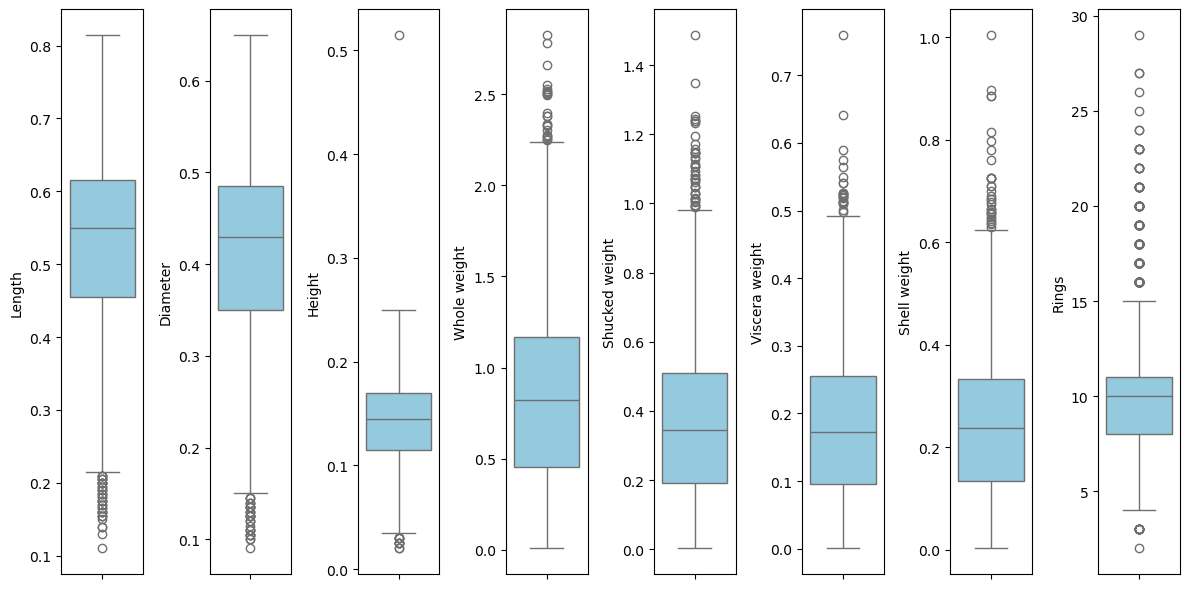

In [85]:
plt.figure(figsize=(12, 6))
numeryczne = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Rings']
for i in range(0, len(numeryczne)):
    plt.subplot(1, len(numeryczne), i+1)
    sns.boxplot(y=dane[numeryczne[i]], color='skyblue')
    plt.tight_layout()

In [87]:
dane[dane["Height"] > 0.4]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3448,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10


# Dalsza analiza

Przedstawimy poszczególne parametry z podziałem na płcie na histogramach.

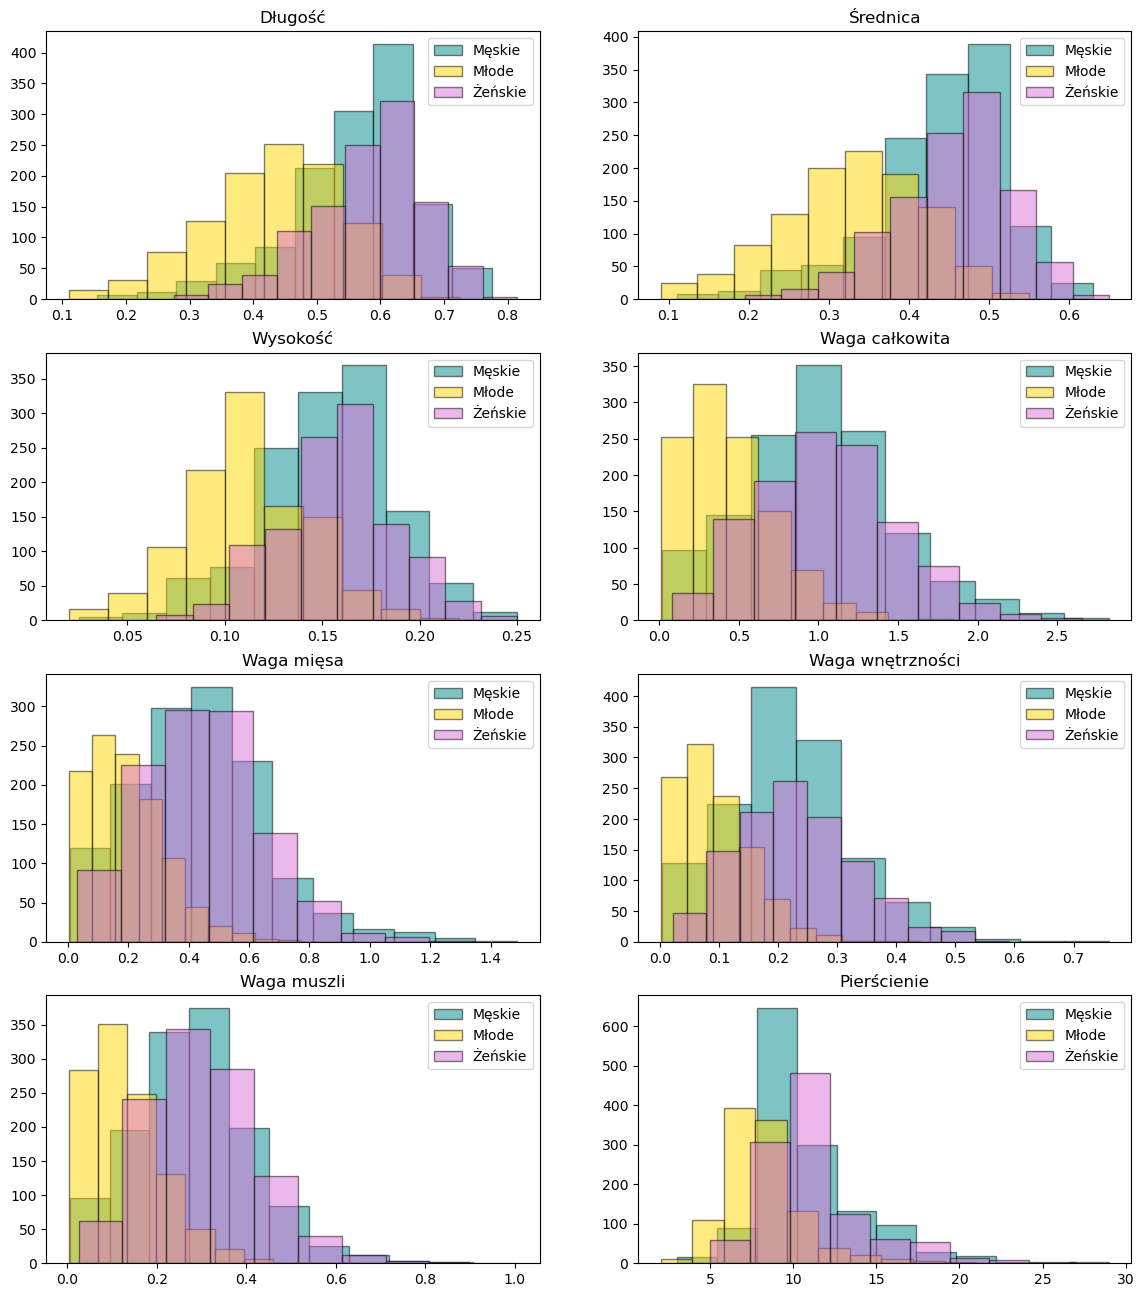

In [90]:
fig, ax = plt.subplots(4, 2, figsize=(14, 16));

ax[0,0].hist((dane[dane["Sex"] == "M"])['Length'],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Męskie");
ax[0,0].hist((dane[dane["Sex"] == "I"])['Length'], color = 'gold',alpha = 0.5,edgecolor = "black",label = "Młode");
ax[0,0].hist((dane[dane["Sex"] == "F"])['Length'], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Żeńskie");
ax[0,0].set_title("Długość");
ax[0,0].legend();

ax[0,1].hist((dane[dane["Sex"] == "M"])['Diameter'],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Męskie");
ax[0,1].hist((dane[dane["Sex"] == "I"])['Diameter'], color = 'gold',alpha = 0.5,edgecolor = "black",label = "Młode");
ax[0,1].hist((dane[dane["Sex"] == "F"])['Diameter'], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Żeńskie");
ax[0,1].set_title("Średnica");
ax[0,1].legend();

ax[1,0].hist((dane[(dane["Sex"] == "M") & (dane['Height'] < 0.4)])['Height'],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Męskie");
ax[1,0].hist((dane[(dane["Sex"] == "I") & (dane['Height'] < 0.4)])['Height'], color = 'gold',alpha = 0.5,edgecolor = "black",label = "Młode");
ax[1,0].hist((dane[(dane["Sex"] == "F") & (dane['Height'] < 0.4)])['Height'], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Żeńskie");
ax[1,0].set_title("Wysokość");
ax[1,0].legend();

ax[1,1].hist((dane[dane["Sex"] == "M"])['Whole weight'],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Męskie");
ax[1,1].hist((dane[dane["Sex"] == "I"])['Whole weight'], color = 'gold',alpha = 0.5,edgecolor = "black",label = "Młode");
ax[1,1].hist((dane[dane["Sex"] == "F"])['Whole weight'], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Żeńskie");
ax[1,1].set_title("Waga całkowita");
ax[1,1].legend();

ax[2,0].hist((dane[dane["Sex"] == "M"])['Shucked weight'],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Męskie");
ax[2,0].hist((dane[dane["Sex"] == "I"])['Shucked weight'], color = 'gold',alpha = 0.5,edgecolor = "black",label = "Młode");
ax[2,0].hist((dane[dane["Sex"] == "F"])['Shucked weight'], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Żeńskie");
ax[2,0].set_title("Waga mięsa");
ax[2,0].legend();

ax[2,1].hist((dane[dane["Sex"] == "M"])['Viscera weight'],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Męskie");
ax[2,1].hist((dane[dane["Sex"] == "I"])['Viscera weight'], color = 'gold',alpha = 0.5,edgecolor = "black",label = "Młode");
ax[2,1].hist((dane[dane["Sex"] == "F"])['Viscera weight'], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Żeńskie");
ax[2,1].set_title("Waga wnętrzności");
ax[2,1].legend();

ax[3,0].hist((dane[dane["Sex"] == "M"])['Shell weight'],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Męskie");
ax[3,0].hist((dane[dane["Sex"] == "I"])['Shell weight'], color = 'gold',alpha = 0.5,edgecolor = "black",label = "Młode");
ax[3,0].hist((dane[dane["Sex"] == "F"])['Shell weight'], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Żeńskie");
ax[3,0].set_title("Waga muszli");
ax[3,0].legend();

ax[3,1].hist((dane[dane["Sex"] == "M"])['Rings'],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Męskie");
ax[3,1].hist((dane[dane["Sex"] == "I"])['Rings'], color = 'gold',alpha = 0.5,edgecolor = "black",label = "Młode");
ax[3,1].hist((dane[dane["Sex"] == "F"])['Rings'], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Żeńskie");
ax[3,1].set_title("Pierścienie");
ax[3,1].legend();

**Wnioski**

* Możemy zauważyć, że młode osobniki osiągają niższe wartości wymiarów oraz wagi niż dorosłe osobniki,
* Żeńskie i męskie osobniki przyjmują podobne wielkości.

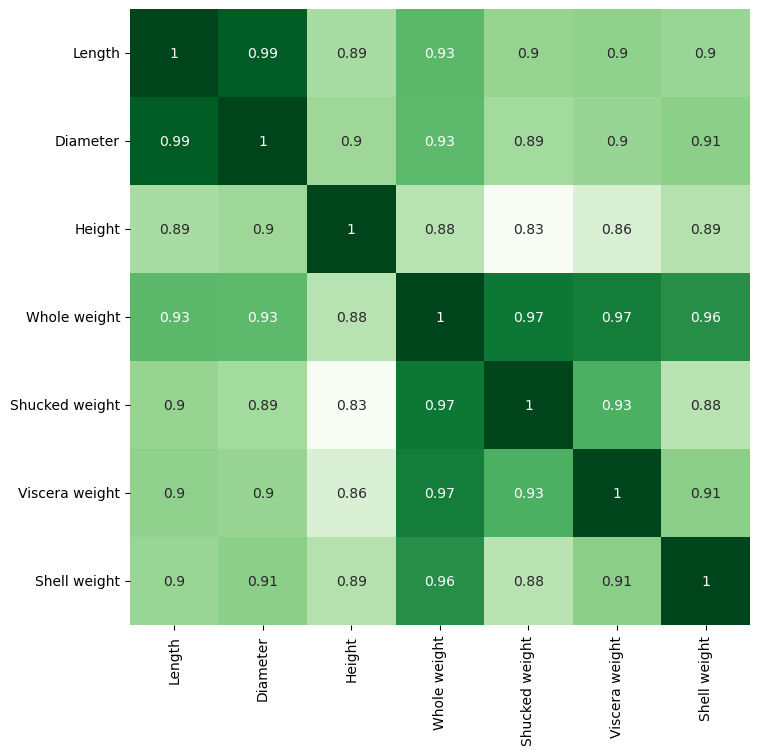

In [94]:
rozmiary = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
corr_matt = dane[rozmiary].corr(method='pearson')
plt.figure(figsize=(8, 8))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

**WNIOSKI**

* Wszystkie kolumny są ze sobą dotatnio skorelowane,
* Występuje duża korelacja między średnicą, a długością muszli,
* Waga całkowita jest silnie skorelowana z pozostałymi wagami.

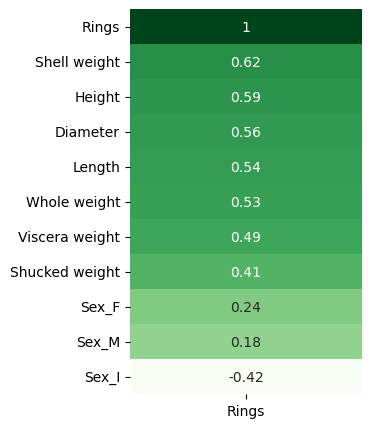

In [97]:
dane1 = pd.get_dummies(dane)
corr_matt = dane1.corr(method='pearson')[['Rings']].sort_values(by='Rings',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

**Wnioski**

* Rozmiary i waga osobników są dodatnio skorelowane na w miarę wysokim poziomie,
* Osobniki młode są ujemnie skorelowane z ilością pierścieni.

In [100]:
dane[(dane['Rings'] > 23)] 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
409,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
787,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885,27
874,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.510,25
1211,M,0.690,0.540,0.185,1.6195,0.5330,0.3530,0.555,24
1260,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375,26
3005,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.525,27
3661,F,0.700,0.540,0.215,1.9780,0.6675,0.3125,0.710,24


In [102]:
dane[(dane['Rings'] < 3)] 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2370,I,0.15,0.1,0.025,0.015,0.0045,0.004,0.005,2


Widzimy, że wymiary powyższych osobników nie odbiegają od normy. Na potrzeby czytelności wykresów nie uwzględnimy na nich powyższych wartości.

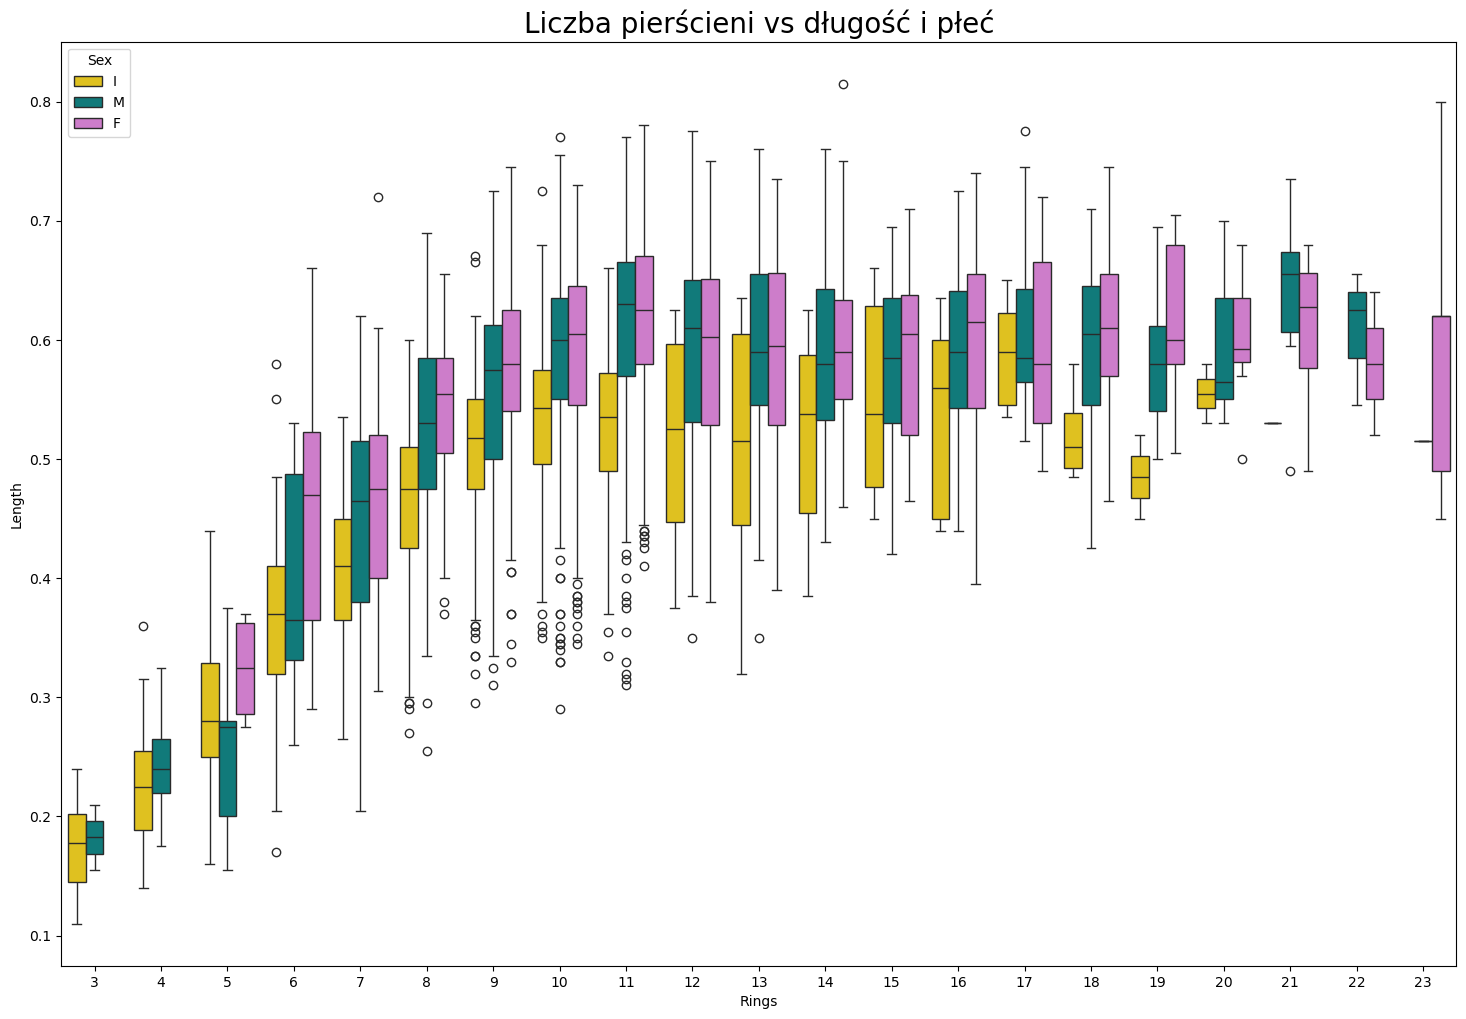

In [107]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Rings', y='Length', hue='Sex', data=dane[(dane['Rings'] <= 23) & (dane['Rings'] >= 3)], palette = ['gold','darkcyan', 'orchid'])
plt.title('Liczba pierścieni vs długość i płeć', fontsize = 20);

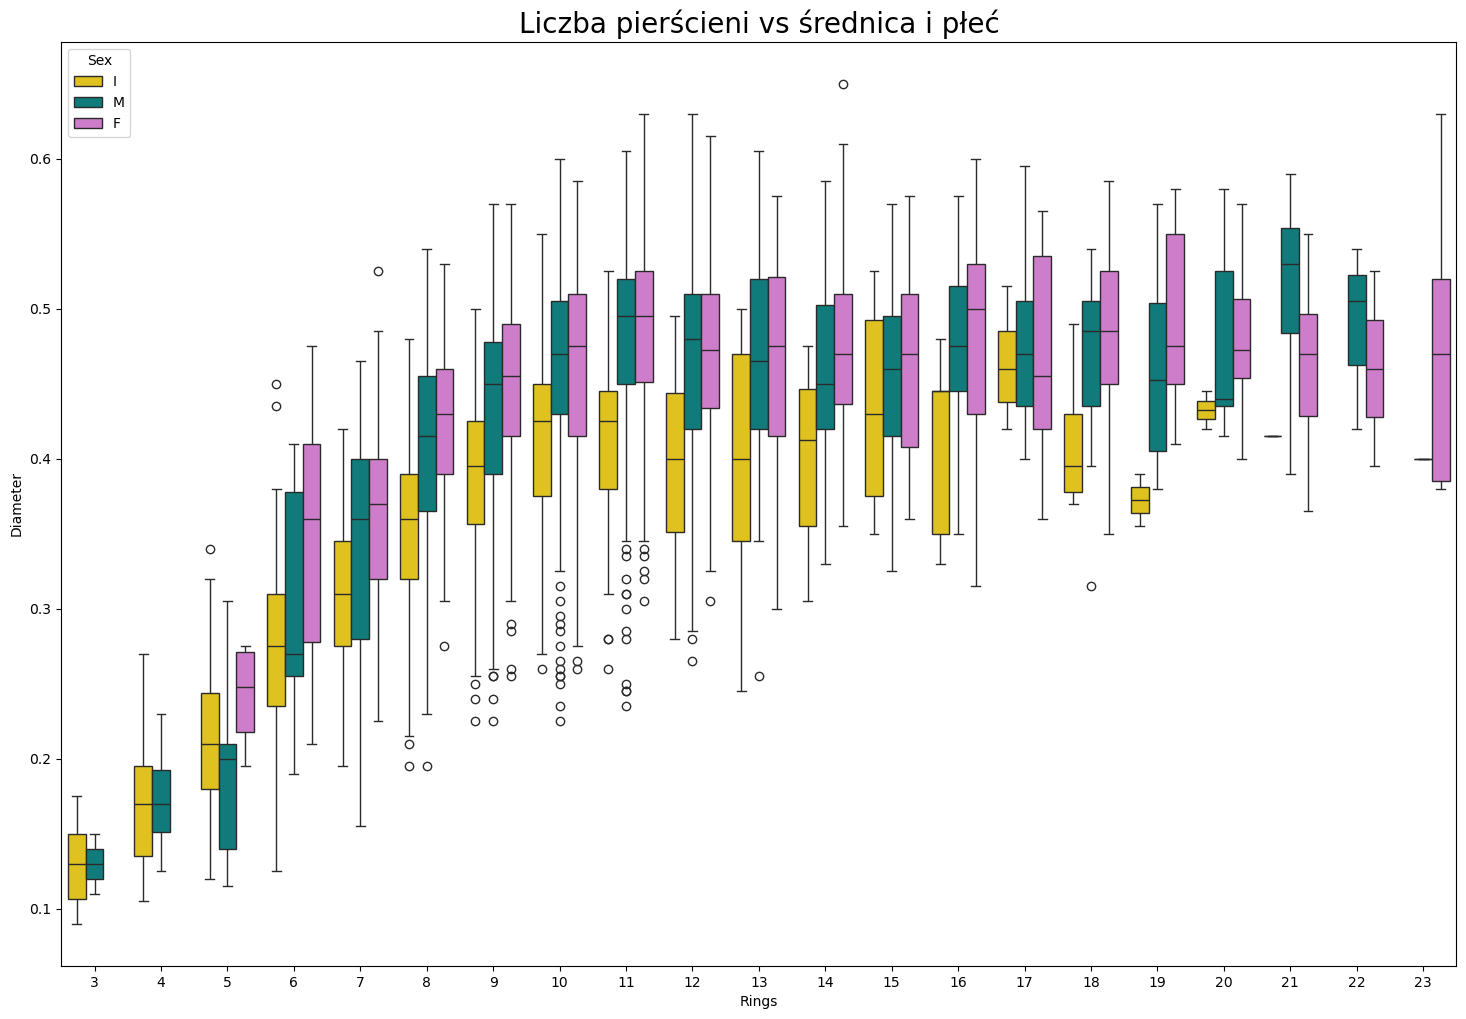

In [109]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Rings', y='Diameter', hue='Sex', data=dane[(dane['Rings'] <= 23) & (dane['Rings'] >= 3)], palette = ['gold','darkcyan', 'orchid'])
plt.title('Liczba pierścieni vs średnica i płeć', fontsize = 20);

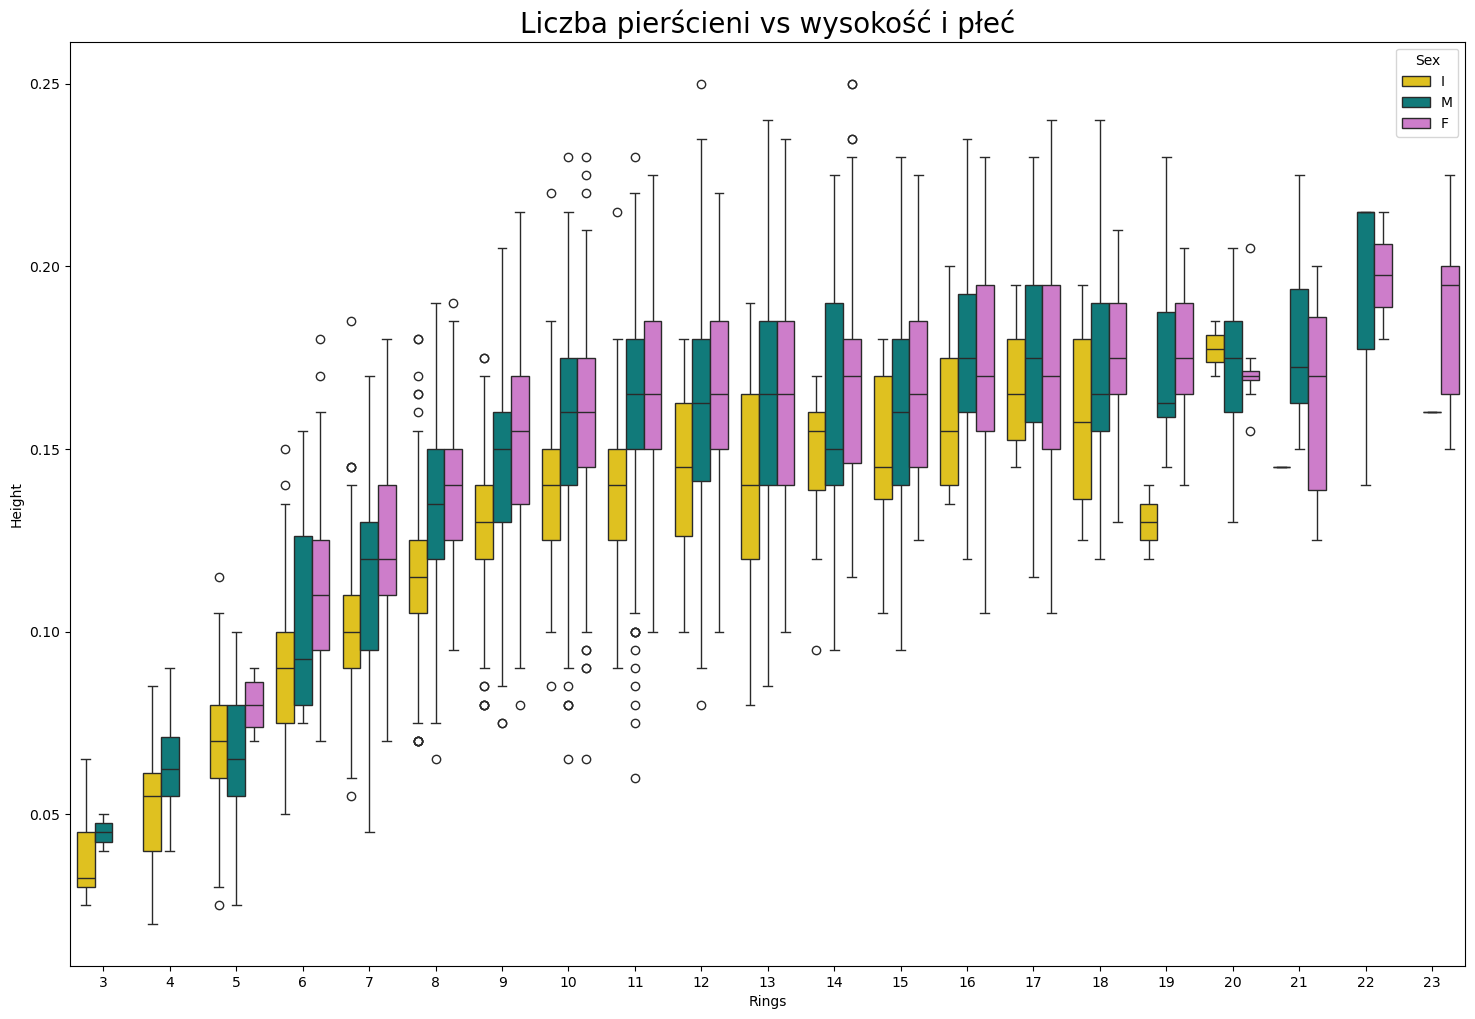

In [110]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Rings', y='Height', hue='Sex', data=dane[(dane['Rings'] <= 23) & (dane['Rings'] >= 3) & (dane['Height'] < 0.4)], palette = ['gold','darkcyan', 'orchid'])
plt.title('Liczba pierścieni vs wysokość i płeć', fontsize = 20);

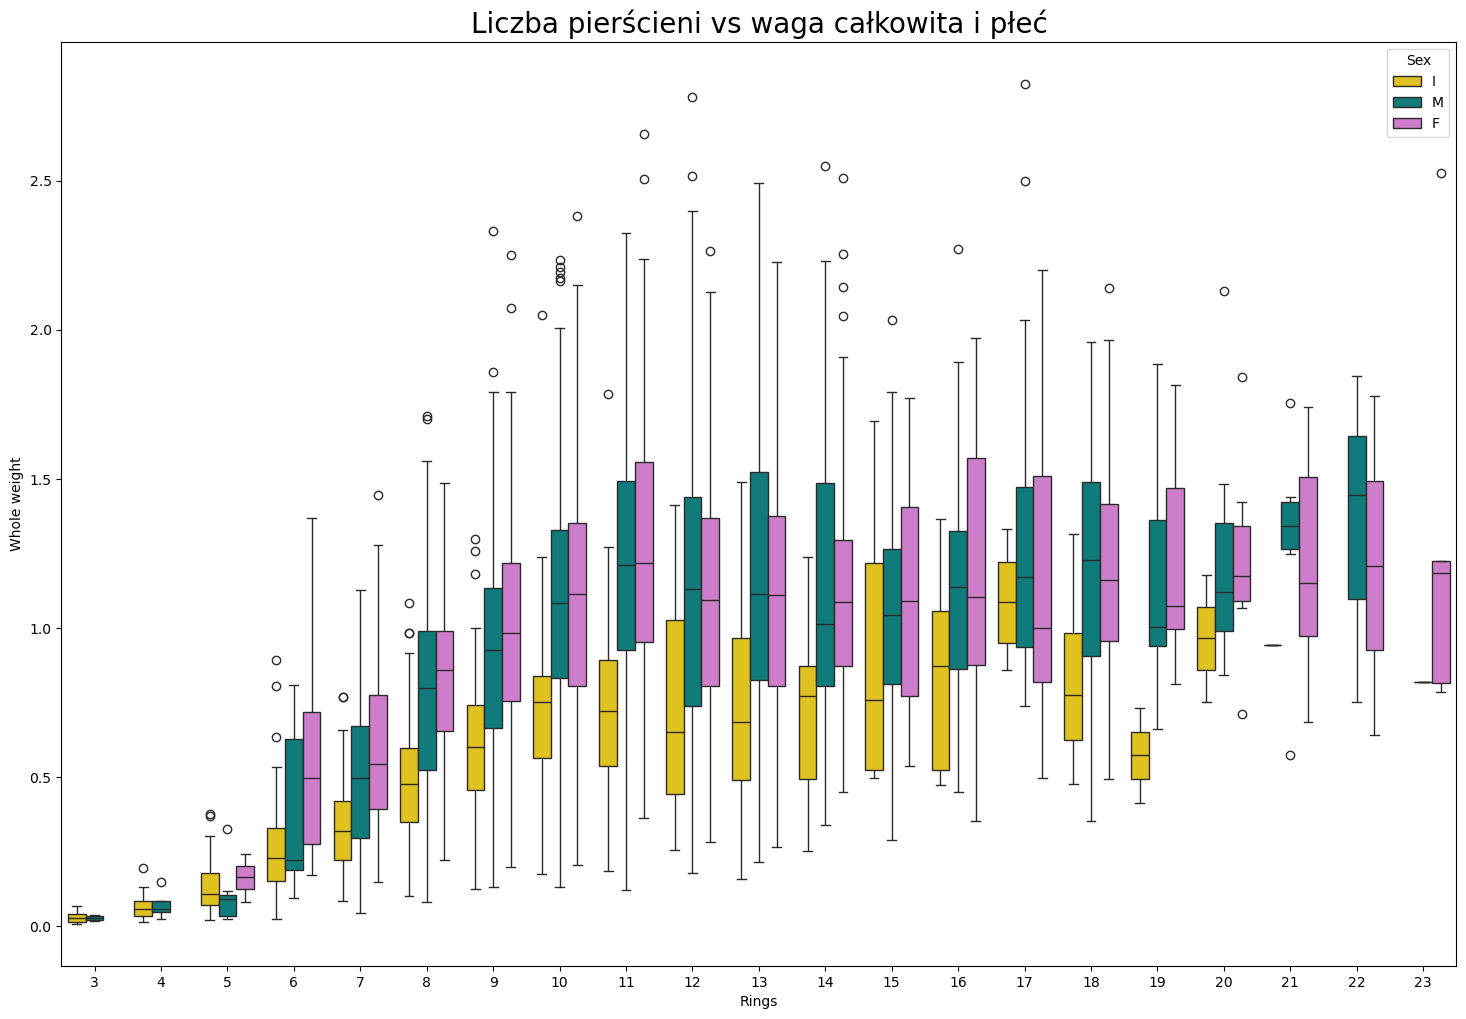

In [111]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Rings', y='Whole weight', hue='Sex', data=dane[(dane['Rings'] <= 23) & (dane['Rings'] >= 3)], palette = ['gold','darkcyan', 'orchid'])
plt.title('Liczba pierścieni vs waga całkowita i płeć', fontsize = 20);

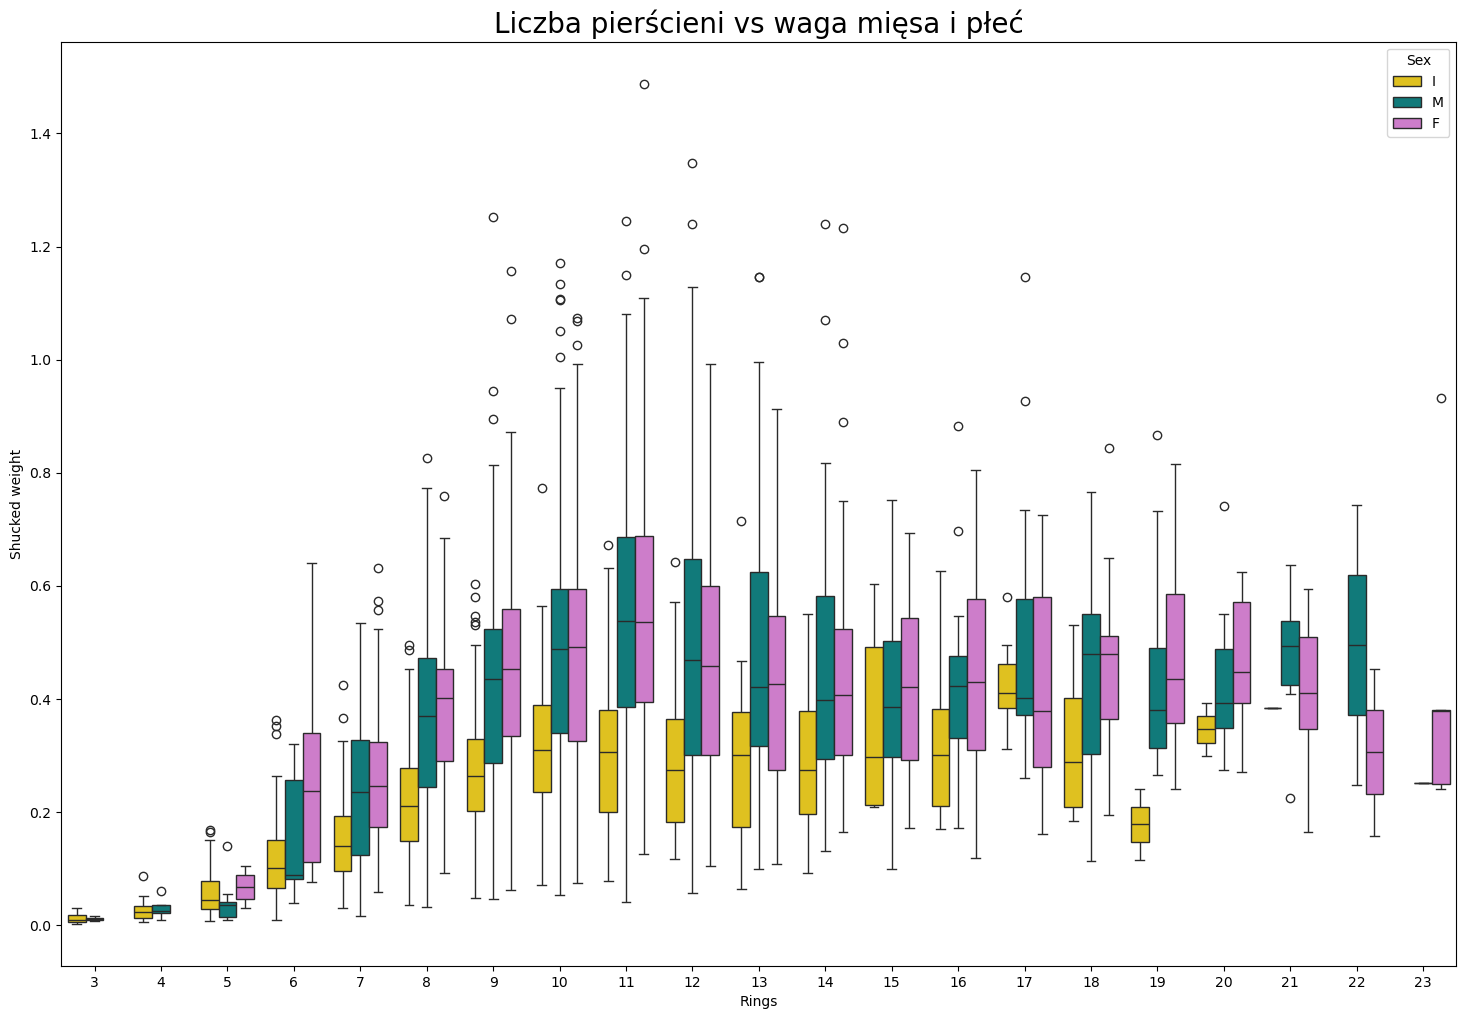

In [112]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Rings', y='Shucked weight', hue='Sex', data=dane[(dane['Rings'] <= 23) & (dane['Rings'] >= 3)], palette = ['gold','darkcyan', 'orchid'])
plt.title('Liczba pierścieni vs waga mięsa i płeć', fontsize = 20);

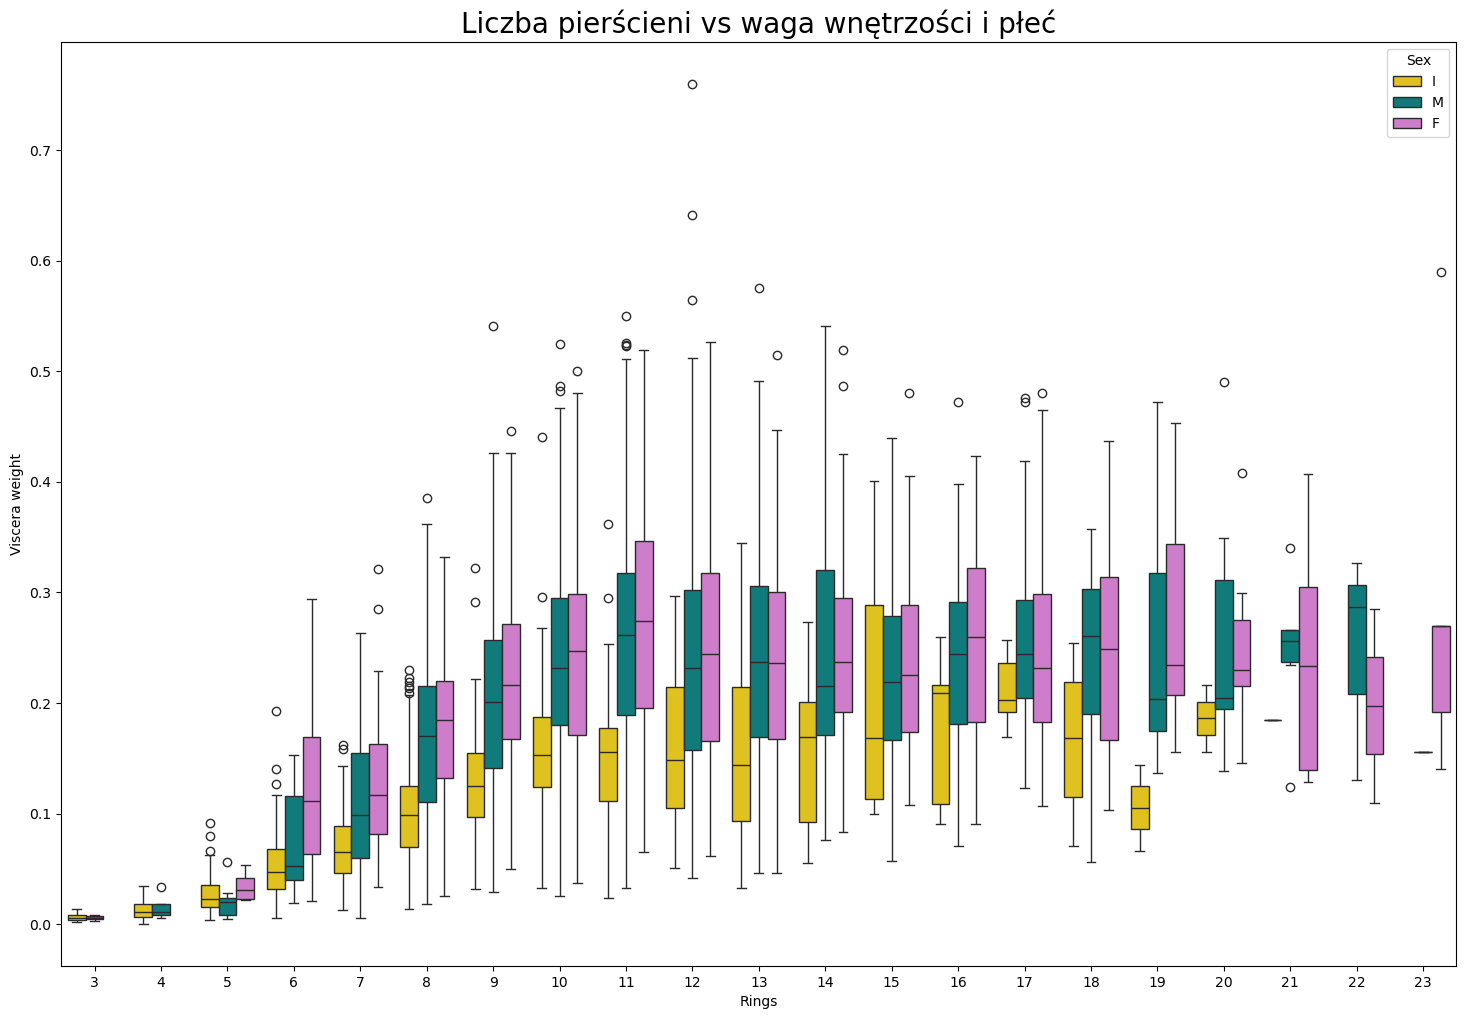

In [114]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Rings', y='Viscera weight', hue='Sex', data=dane[(dane['Rings'] <= 23) & (dane['Rings'] >= 3)], palette = ['gold','darkcyan', 'orchid'])
plt.title('Liczba pierścieni vs waga wnętrzości i płeć', fontsize = 20);

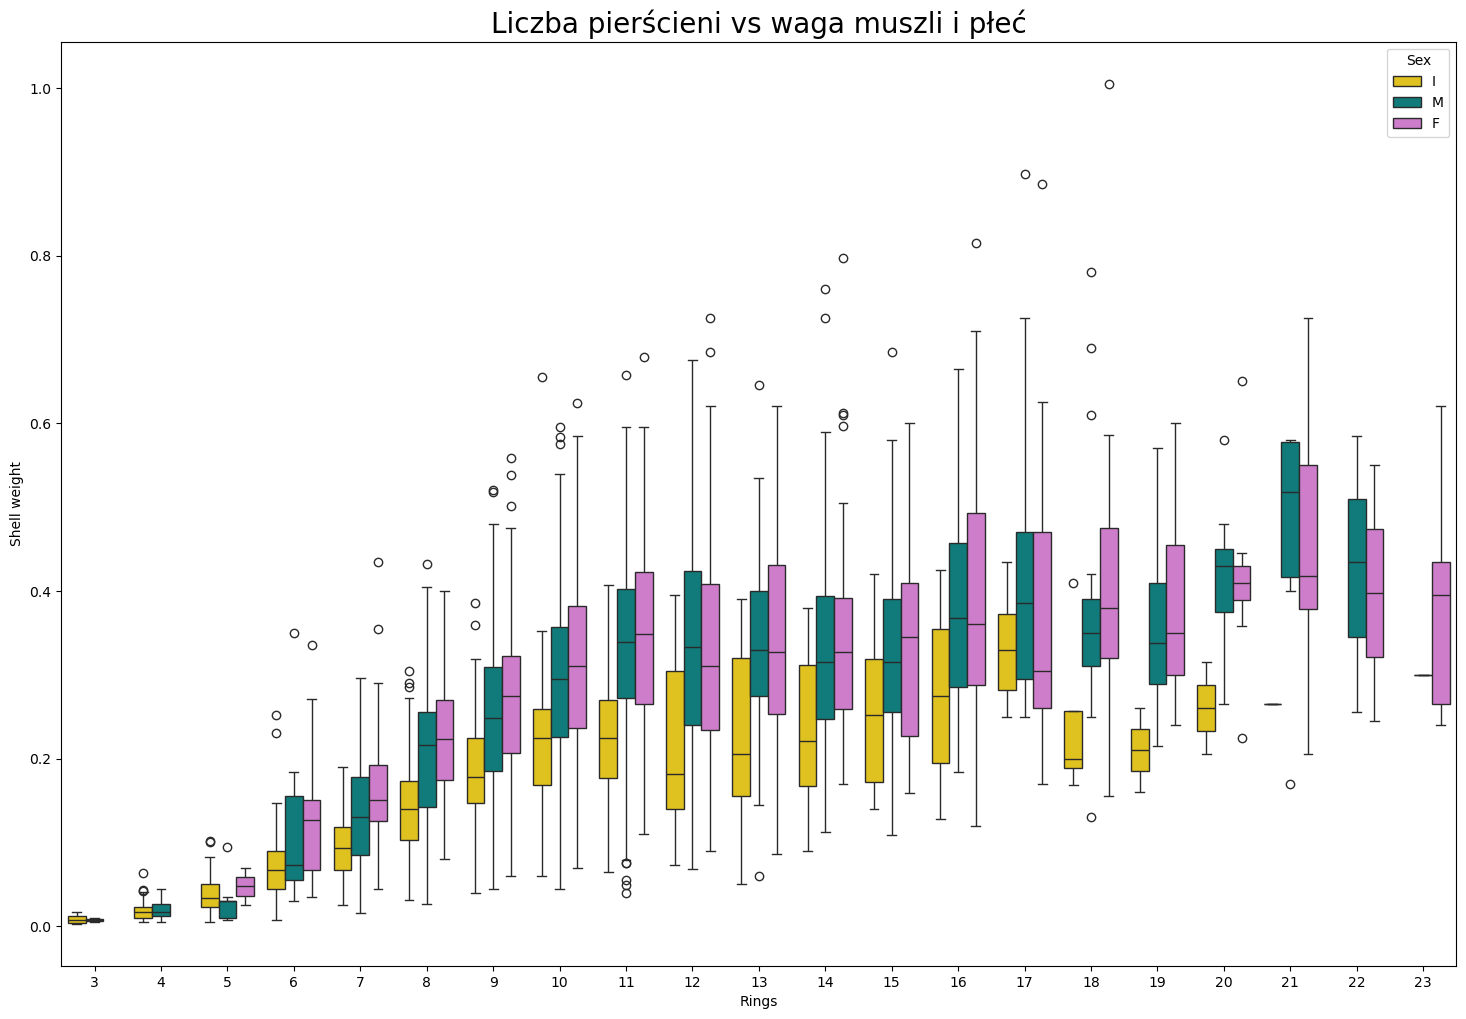

In [116]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Rings', y='Shell weight', hue='Sex', data=dane[(dane['Rings'] <= 23) & (dane['Rings'] >= 3)], palette = ['gold','darkcyan', 'orchid'])
plt.title('Liczba pierścieni vs waga muszli i płeć', fontsize = 20);

**Wnioski:**

* wykresy pudełkowe potwierdzają dodatnie skorelowanie zmiennych;
* osobniki M i F osiągają podobne wymiary oraz wagi;
* więcej osobników 'infant' osiąga niższe wymiary oraz wagi, niż osobników o określonej płci, lecz pomimo, że powinny one być młodsze od osobników M i F, to osobniki 'infant' występujące w danych mają nawet do 20 pierścieni i osiągają podobne wielkości, co inne osobniki o określonej płci. Jako 'infant' mogą być zatem uznane osobniki, u których badacze z pewnych powodów nie byli w stanie jednoznacznie określić płci i określenie to nie jest związane z wiekiem uchowca.